<a href="https://colab.research.google.com/github/DrDAN6770/DataSciense-with-Python/blob/main/%E8%B3%87%E6%96%99%E7%A7%91%E5%AD%B8%E5%B7%A5%E5%85%B7%E7%AE%B1/%E7%A4%BE%E7%BE%A4%E5%85%B1%E5%AD%B8/Task%2004/Task_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
df = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
df_train = df.copy()

# 1.

---


請問資料中有哪些「欄位」你覺得是多餘的，在分析過程中應該被排除的呢？為什麼？
* PassengerId : 個別ID，與生存率無直接相關
* Ticket : 與ID相同
* Cabin : 缺失過多，且只有一定價位以上才有船艙號，可由Fare、Embarked作為特徵代表



In [54]:
df_train = df_train.drop(['Ticket', 'PassengerId', 'Cabin'], axis=1)

# 2.

---


針對「有缺失值」的欄位，嘗試不同的處理策略（例如：常數、中位數、平均數填補）比較結果。

In [55]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [ ]:
# Age
df_train['Age'].median() # 28
df_train['Age'].mean() # 29.69
df_train['Age'].mode() # 24

In [ ]:
# Embarked
df_train['Embarked'].mode()[0] # S

In [57]:
# Embarked眾數填補缺失
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])

# Age中位數填補
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())

# 3.

---

針對「非數值型」的欄位，嘗試不同的處理策略（例如：LabelEncoder或OneHotEncoder）比較結果

In [58]:
# Sec轉數字
df_train['Sex'] = df_train['Sex'].replace({'male': 0, 'female': 1})

In [59]:
# Embarked轉one-hot encode
Embarked_encode = pd.get_dummies(df_train['Embarked'],prefix = 'Embarked')
Embarked_encode

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [60]:
# Pclass轉one-hot encode
Pclass_encode = pd.get_dummies(df_train['Pclass'], prefix = 'Pclass')
Pclass_encode

,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [61]:
df_train.isnull().sum().sum() # 0

0

#4.


---
4. 請你嘗試不同的特徵工程手法，產生可以幫助分析結果的新變數。


In [62]:
df_train = pd.concat([df_train, Embarked_encode, Pclass_encode], axis =1)
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,S,0,0,1,0,0,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,C,1,0,0,1,0,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,S,0,0,1,0,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,S,0,0,1,1,0,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,S,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,13.0000,S,0,0,1,0,1,0
887,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,30.0000,S,0,0,1,1,0,0
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,23.4500,S,0,0,1,0,0,1
889,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,30.0000,C,1,0,0,1,0,0


## 頭銜(title)處理

---

在當時的英國社會，頭銜是很重要的社會地位，會影響到登船順序

In [78]:
df_train['Title'] = df_train['Name'].map(lambda x : x.split(',')[1].split('.')[0].strip())
df_train['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [80]:
title_Classify = {
           'Sir' : 'Royalty',   #王室
           'Jonkheer' : 'Royalty',#王室
           'the Countess' : 'Royalty',#王室
           'Lady' : 'Royalty',  #王室
           'Capt' : 'official',  #船長
           'Col' : 'official',  #上校
           'Major' : 'official', #市長
           'Don' : 'official',  #大學教師
           'Rev' : 'official',  #牧師
           'Dr' : 'official',  #醫生
           'Mlle' : 'Miss',  #未婚女子
           'Miss' : 'Miss',  #未婚女子
           'Mme' : 'Mrs',   #已婚女性
           'Mrs' : 'Mrs',   #已婚女性
           'Ms' : 'Mrs',   #未婚、已婚女子
           'Mr' : 'Mr',    #男士
           'Master' : 'Master',  #專家
           'Rev' : 'official',  #牧師
}

In [81]:
df_train['Title'] = df_train['Title'].replace(title_Classify)
df_train['Title'].value_counts()

Mr          517
Miss        184
Mrs         127
Master       40
official     19
Royalty       4
Name: Title, dtype: int64

In [85]:
df_train = df_train.drop(['Name','Pclass','Embarked'], axis=1)

In [88]:
df_train = pd.get_dummies(df_train)
df_train

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Royalty,Title_official
0,0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0,0,0,1,0,0
2,1,1,26.0,0,0,7.9250,0,0,1,0,0,1,0,1,0,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,1,0,0,0,0,0,1,0,0
4,0,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,0,0,13.0000,0,0,1,0,1,0,0,0,0,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,1,1,0,0,0,1,0,0,0,0
888,0,1,28.0,1,2,23.4500,0,0,1,0,0,1,0,1,0,0,0,0
889,1,0,26.0,0,0,30.0000,1,0,0,1,0,0,0,0,1,0,0,0


<Axes: >

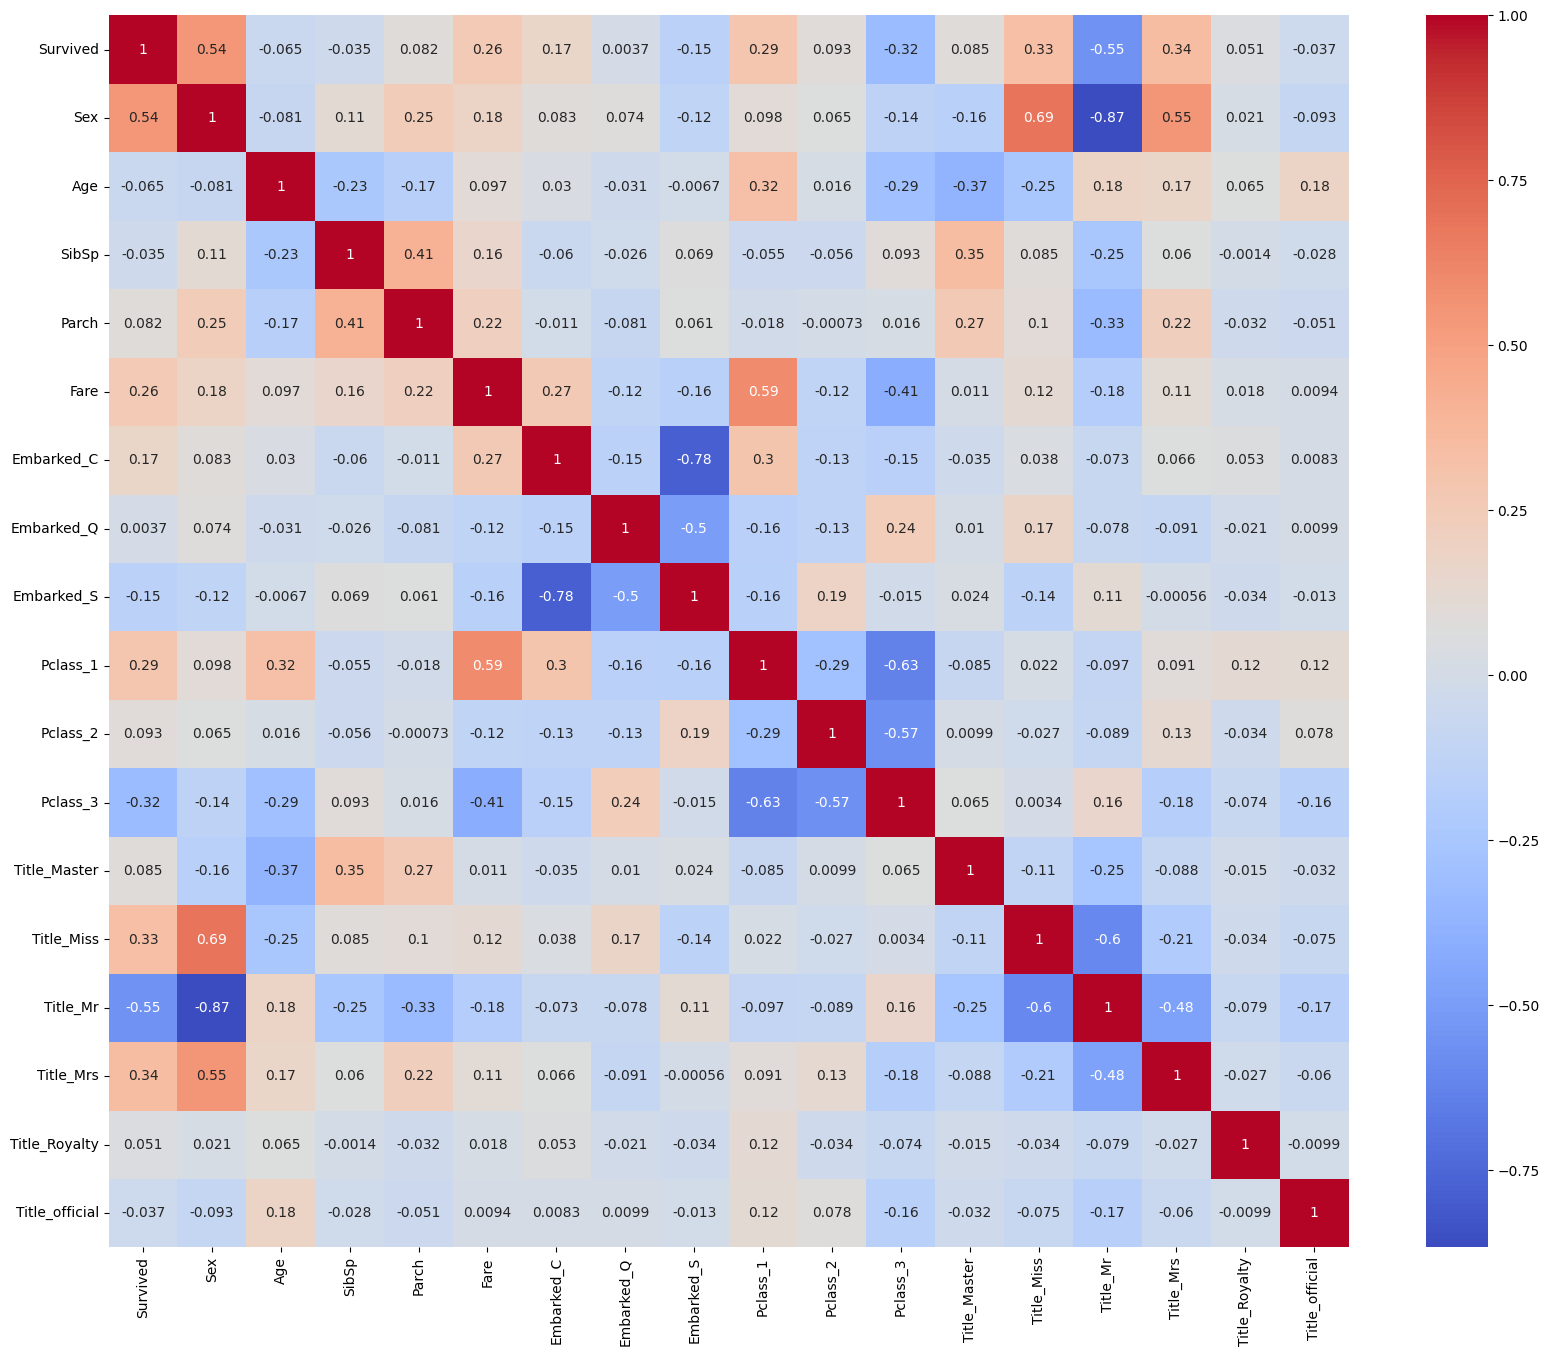

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df_train.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

# Define X、Y

In [89]:
train_X = df_train.iloc[:,1:]
train_y = df_train['Survived']

In [95]:
# 迴歸 & 交叉驗證
log = LogisticRegression(random_state=0, max_iter=3000)
scores = cross_val_score(log, train_X, train_y.values.ravel(),cv=5,scoring='accuracy')
scores

array([0.83798883, 0.81460674, 0.80337079, 0.79775281, 0.87078652])